In [175]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from scipy.ndimage import gaussian_filter1d
%matplotlib inline


<AxesSubplot:xlabel='TIME'>

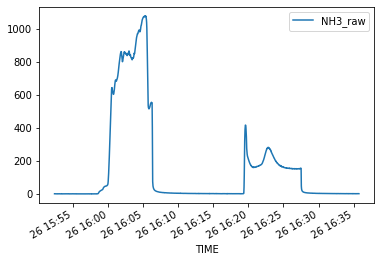

In [176]:
df = pd.read_excel('Ammonia_data7_19.xlsx')
df['TIME'] = [datetime.datetime.combine(datetime.date.today(), t) for t in df['TIME']]
df = df.loc[1780:4500]
df.plot(x='TIME', y='NH3_raw', style='-')

In [177]:
dat = pd.read_csv('testing_7_19_21_ABCD_ammoniaTesting.csv', names  = ['TIME','Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4'])
dat.head()

,TIME,Sensor 1,Sensor 2,Sensor 3,Sensor 4
0,2021-07-19 15:39:35,80429,137874,80026,88955
1,2021-07-19 15:39:36,80429,138414,80026,89304
2,2021-07-19 15:39:37,80429,137874,80026,88955
3,2021-07-19 15:39:38,80429,137874,80026,88955
4,2021-07-19 15:39:39,80429,137874,80026,88955


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

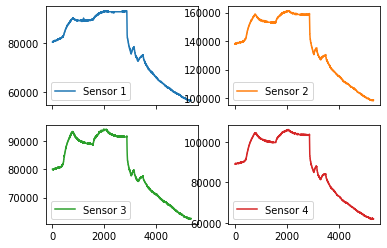

In [178]:
#dat = dat.loc[0:2060]
dat.plot(subplots=True, layout=(2,2))

In [179]:
type(df['TIME'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [180]:
Time = []
for x in range(len(dat['Sensor 1'])):
    Time.append(df['TIME'].iloc[0] +  datetime.timedelta(0,x))
dat['TIME'] = Time

In [181]:
dat['Sensor 1'] = gaussian_filter1d(dat['Sensor 1'], 7)
dat['Sensor 2'] = gaussian_filter1d(dat['Sensor 2'], 7)
dat['Sensor 3'] = gaussian_filter1d(dat['Sensor 3'], 7)
dat['Sensor 4'] = gaussian_filter1d(dat['Sensor 4'], 7)
df['NH3_raw'] = gaussian_filter1d(df['NH3_raw'], 14)
#d1.plot(subplots=True, layout=(2,2))

In [182]:
df = df[ df['TIME'] > dat['TIME'].iloc[0]]
df = df[ df['TIME'] < dat['TIME'].iloc[-1]]

In [183]:
dat = dat[ dat['TIME'] > df['TIME'].iloc[0]]
dat = dat[ dat['TIME'] < df['TIME'].iloc[-1]]

<ipython-input-184-f722de71ad63>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax12.set_xticklabels([0,5,10,15,20,25,30,35,40])
<ipython-input-184-f722de71ad63>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_xticklabels([0,5,10,15,20,25,30,35,40])
<ipython-input-184-f722de71ad63>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax32.set_xticklabels([0,5,10,15,20,25,30,35,40])
<ipython-input-184-f722de71ad63>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax42.set_xticklabels([0,5,10,15,20,25,30,35,40])
<ipython-input-184-f722de71ad63>:57: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


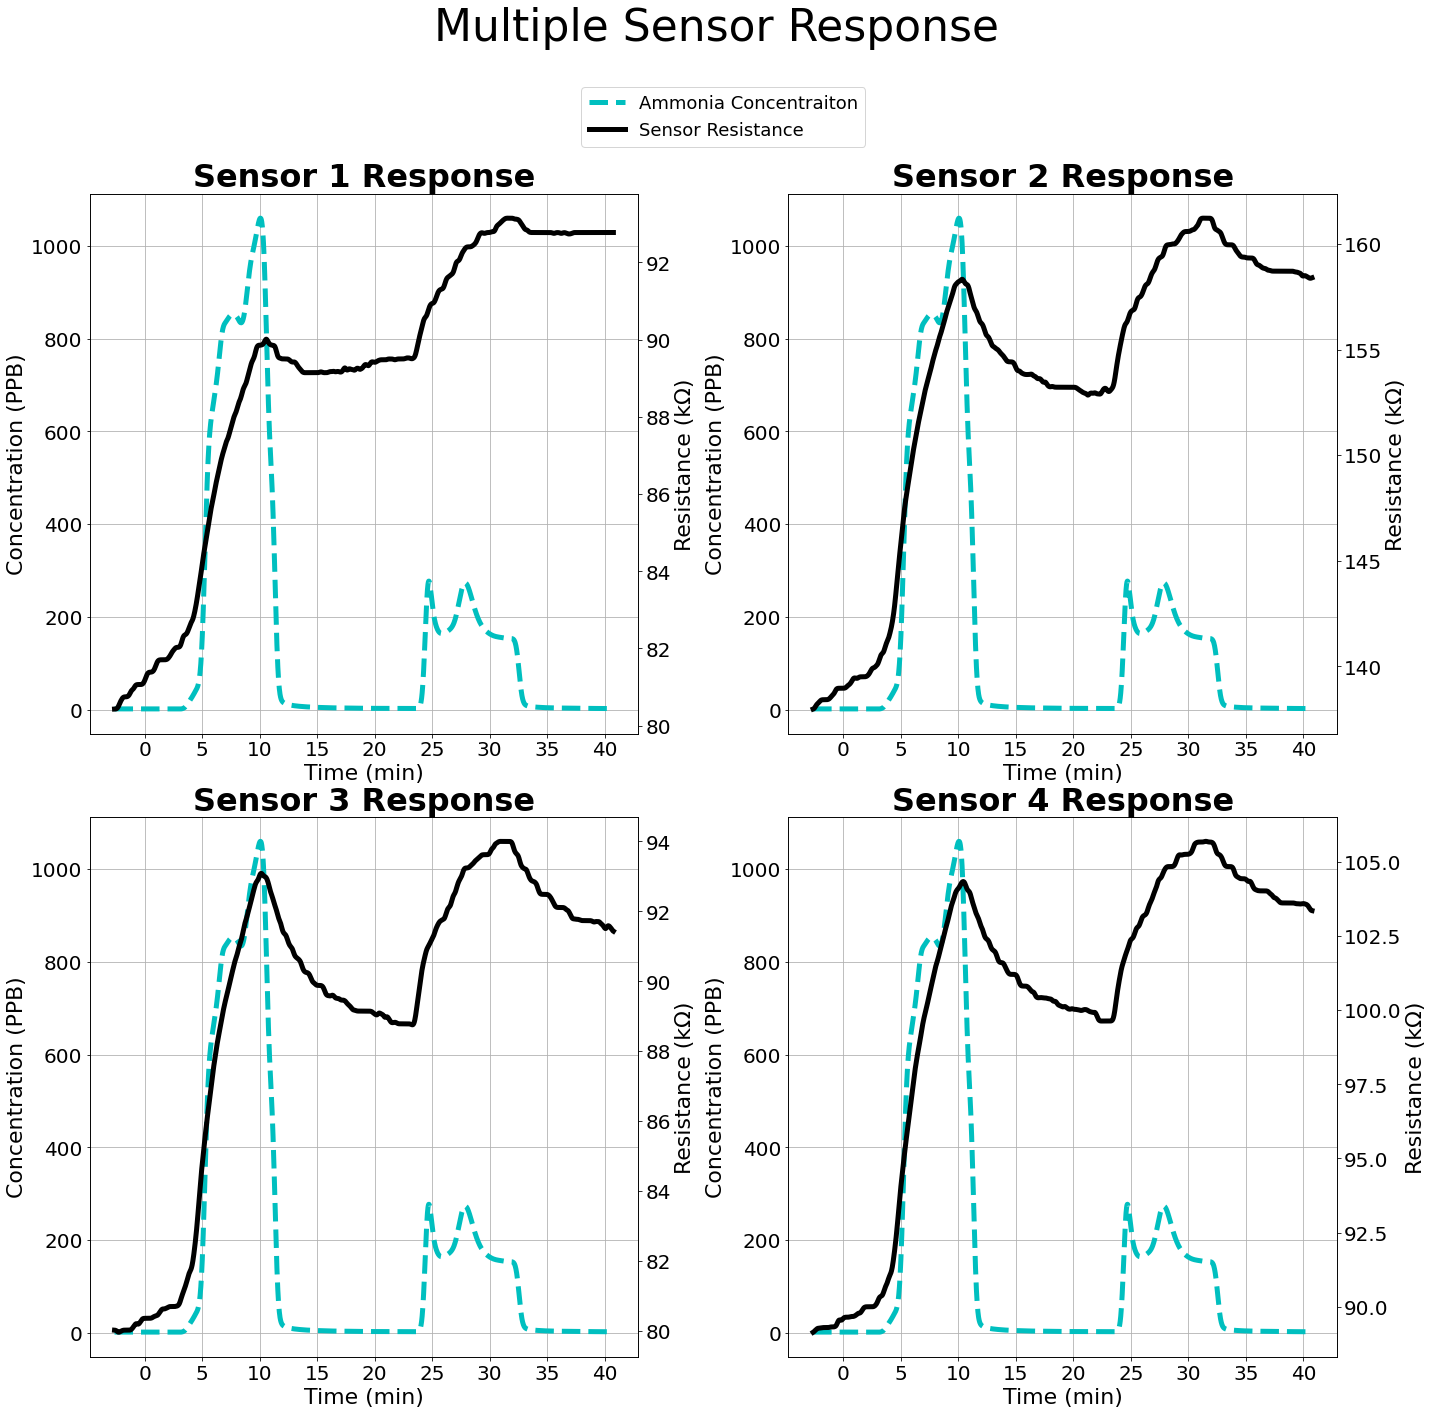

In [184]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20),constrained_layout=True)


ax12 = ax1.twinx()
ax1.grid()
ax1.plot(df['TIME'],df['NH3_raw'],'--c', label = 'Ammonia Concentraiton', linewidth = 5) #Piccaro
ax12.plot(dat['TIME'] ,dat['Sensor 1']/1000,'-k',label = 'Sensor Resistance', linewidth = 5)#Sensor
ax1.set_title('Sensor 1 Response', fontsize = 32, fontweight ='bold')
ax1.set_ylabel('Concentration (PPB)',fontsize = 22)
ax12.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax1.tick_params( labelsize=20)
ax12.tick_params( labelsize=20)
ax1.set_xlabel('Time (min)',fontsize = 22)
ax12.set_xticklabels([0,5,10,15,20,25,30,35,40])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)


ax22 = ax2.twinx()
ax2.grid()
ax2.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax22.plot(dat['TIME'] ,dat['Sensor 2']/1000,'-k', linewidth = 5)#Sensor
ax2.set_title('Sensor 2 Response', fontsize = 32, fontweight ='bold')
ax2.set_ylabel('Concentration (PPB)',fontsize = 22)
ax22.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax2.tick_params( labelsize=20)
ax22.tick_params( labelsize=20)
ax2.set_xlabel('Time (min)',fontsize = 22)
ax22.set_xticklabels([0,5,10,15,20,25,30,35,40])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)


ax32 = ax3.twinx()
ax3.grid()
ax3.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax32.plot(dat['TIME'] ,dat['Sensor 3']/1000,'-k', linewidth = 5)#Sensor
ax3.set_title('Sensor 3 Response', fontsize = 32, fontweight ='bold')
ax3.set_ylabel('Concentration (PPB)',fontsize = 22)
ax32.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax3.tick_params( labelsize=20)
ax32.tick_params( labelsize=20)
ax3.set_xlabel('Time (min)',fontsize = 22)
ax32.set_xticklabels([0,5,10,15,20,25,30,35,40])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)

ax42 = ax4.twinx()
ax4.grid()
ax4.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax42.plot(dat['TIME'] ,dat['Sensor 4']/1000,'-k', linewidth = 5)#Sensor
ax4.set_title('Sensor 4 Response', fontsize = 32, fontweight ='bold')
ax4.set_ylabel('Concentration (PPB)',fontsize = 22)
ax42.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax4.tick_params( labelsize=20)
ax42.tick_params( labelsize=20)
ax4.set_xlabel('Time (min)',fontsize = 22)
ax42.set_xticklabels([0,5,10,15,20,25,30,35,40])
fig.suptitle("Multiple Sensor Response", fontsize = 44)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.legend(loc='upper left', bbox_to_anchor=(.4, .93), fontsize = 18)

In [185]:
dat = dat.loc[0:550]
df = df[ df['TIME'] > dat['TIME'].iloc[0]]
df = df[ df['TIME'] < dat['TIME'].iloc[-1]]

<ipython-input-186-edfd6361a424>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax12.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
<ipython-input-186-edfd6361a424>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax22.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
<ipython-input-186-edfd6361a424>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax32.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
<ipython-input-186-edfd6361a424>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax42.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
<ipython-input-186-edfd6361a424>:57: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


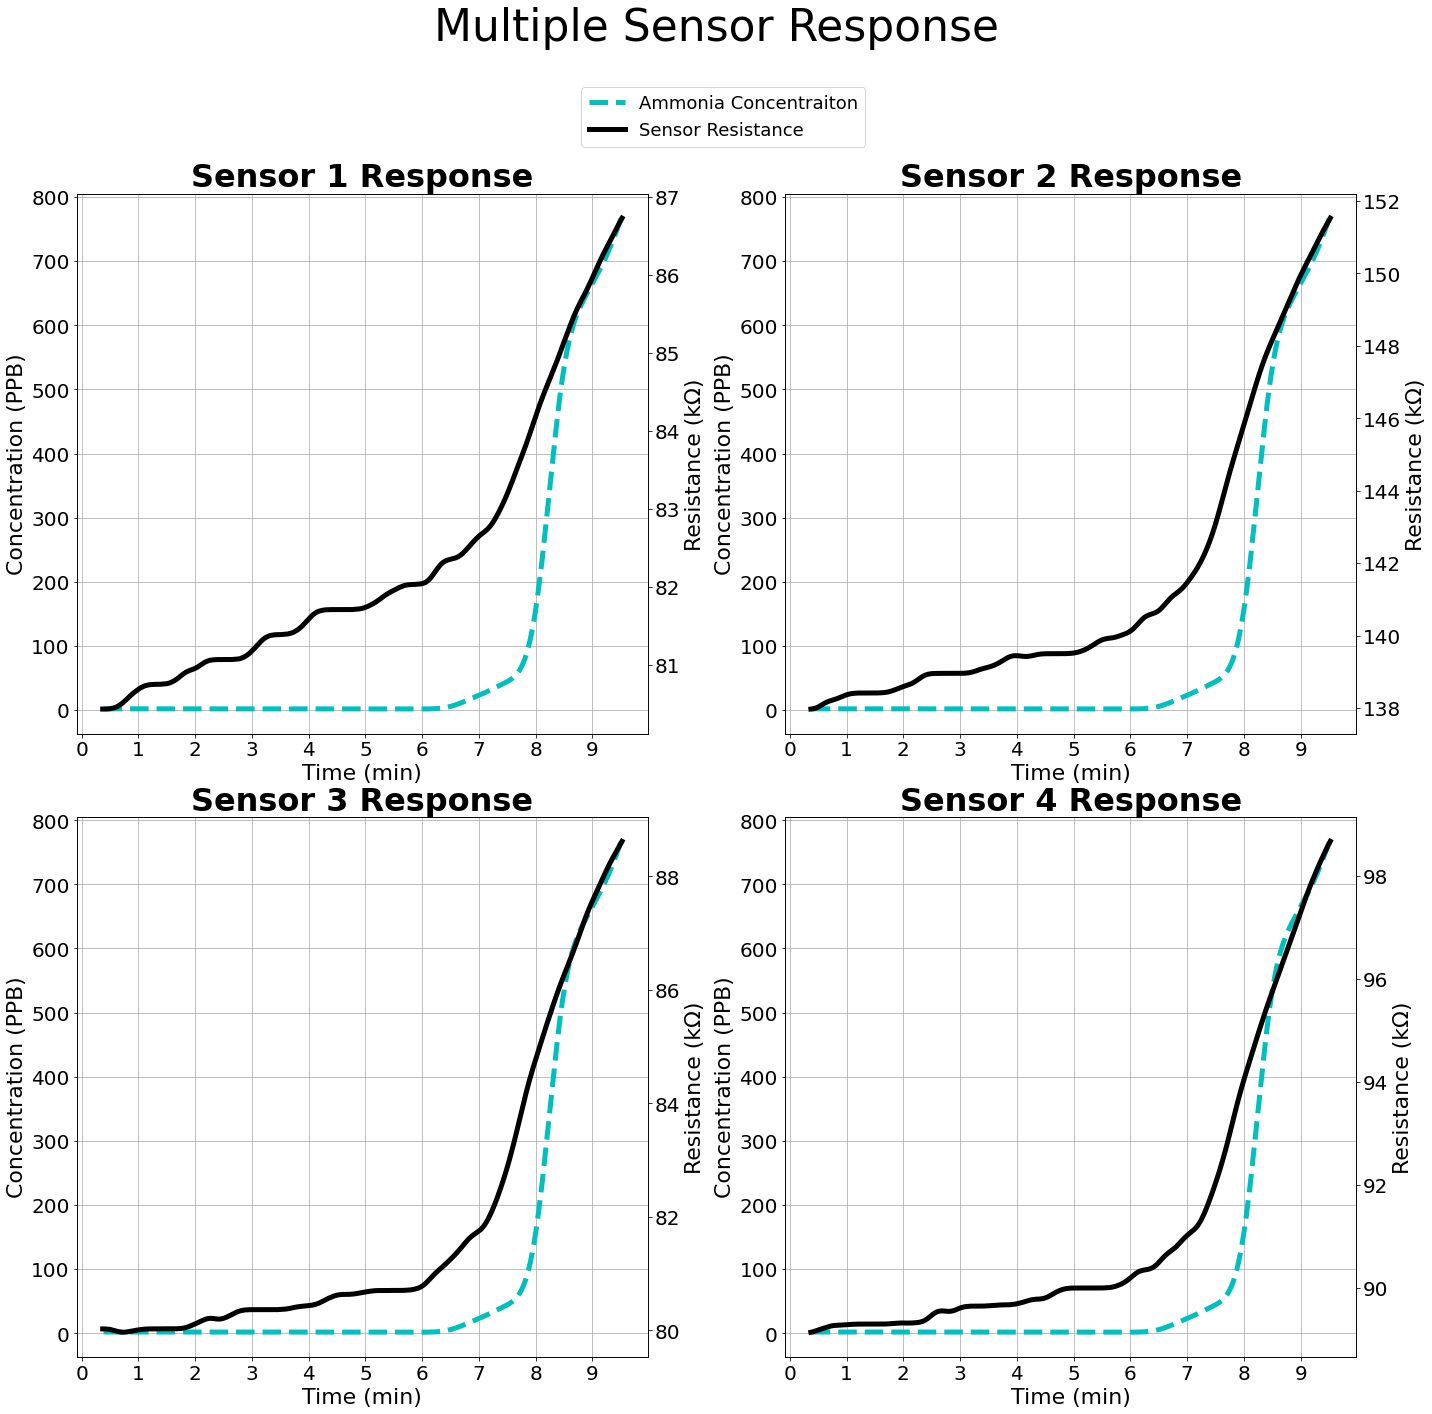

In [186]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,20), constrained_layout=True)


ax12 = ax1.twinx()
ax1.grid()
ax1.plot(df['TIME'],df['NH3_raw'],'--c', label = 'Ammonia Concentraiton', linewidth = 5) #Piccaro
ax12.plot(dat['TIME'] ,dat['Sensor 1']/1000,'-k',label = 'Sensor Resistance', linewidth = 5)#Sensor
ax1.set_title('Sensor 1 Response', fontsize = 32, fontweight ='bold')
ax1.set_ylabel('Concentration (PPB)',fontsize = 22)
ax12.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax1.tick_params( labelsize=20)
ax12.tick_params( labelsize=20)
ax1.set_xlabel('Time (min)',fontsize = 22)
ax12.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)


ax22 = ax2.twinx()
ax2.grid()
ax2.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax22.plot(dat['TIME'] ,dat['Sensor 2']/1000,'-k', linewidth = 5)#Sensor
ax2.set_title('Sensor 2 Response', fontsize = 32, fontweight ='bold')
ax2.set_ylabel('Concentration (PPB)',fontsize = 22)
ax22.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax2.tick_params( labelsize=20)
ax22.tick_params( labelsize=20)
ax2.set_xlabel('Time (min)',fontsize = 22)
ax22.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)


ax32 = ax3.twinx()
ax3.grid()
ax3.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax32.plot(dat['TIME'] ,dat['Sensor 3']/1000,'-k', linewidth = 5)#Sensor
ax3.set_title('Sensor 3 Response', fontsize = 32, fontweight ='bold')
ax3.set_ylabel('Concentration (PPB)',fontsize = 22)
ax32.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax3.tick_params( labelsize=20)
ax32.tick_params( labelsize=20)
ax3.set_xlabel('Time (min)',fontsize = 22)
ax32.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
#fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 18)

ax42 = ax4.twinx()
ax4.grid()
ax4.plot(df['TIME'],df['NH3_raw'],'--c', linewidth = 5) #Piccaro
ax42.plot(dat['TIME'] ,dat['Sensor 4']/1000,'-k', linewidth = 5)#Sensor
ax4.set_title('Sensor 4 Response', fontsize = 32, fontweight ='bold')
ax4.set_ylabel('Concentration (PPB)',fontsize = 22)
ax42.set_ylabel('Resistance (k\u03A9)',fontsize = 22)
ax4.tick_params( labelsize=20)
ax42.tick_params( labelsize=20)
ax4.set_xlabel('Time (min)',fontsize = 22)
ax42.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
fig.suptitle("Multiple Sensor Response", fontsize = 44)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.legend(loc='upper left', bbox_to_anchor=(.4, .93), fontsize = 18)